# UJM - Master DSC/MLDM - Deep Learning - TP2a - Autoencoders

# Part . Autoencoder

## 1.1 Feed-forward Autoencoder

We write a quick feed-forward autoencoder mapping from images of size 728 to 32, then decode back to size 728

In [1]:
from __future__ import absolute_import, division, print_function
%matplotlib inline

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, MaxPooling2D, Lambda
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import ELU, PReLU, LeakyReLU, Conv2D, UpSampling2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import keras.losses as Losses
#import keras.backend as K

import random
import matplotlib.pyplot as plt
import sys
import numpy as np


In [2]:
input_img = Input(shape=(28,28,1,))
flat = Flatten()(input_img)
encoded = Dense(128, activation='relu')(flat)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Reshape(target_shape = (28,28,1,))(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()
#Note above we used the binary_categorical_crossentropy, you could also use the mean_squared_error,
#in that case you could also replace the sigmoid activation of the last layer by a ReLu/Linear activation

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [4]:
def print_imgs(X):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 2))
    for i in range(n):
        # display reconstruction
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(X[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    plt.close()

**Train the Autoencoder**

original images:


<Figure size 2000x200 with 0 Axes>

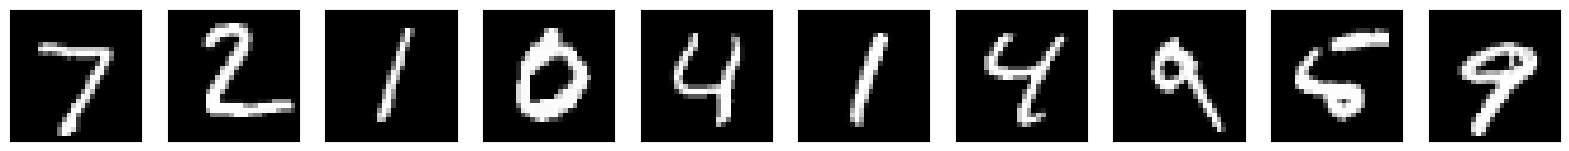

Reconstruction error:

[0.2419823557138443, 0.15040071308612823]


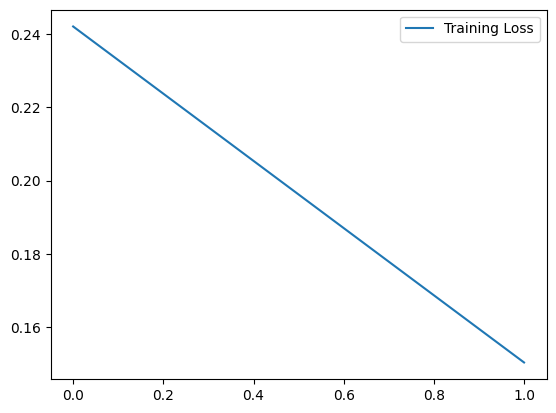

decoded images at epoch  5 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


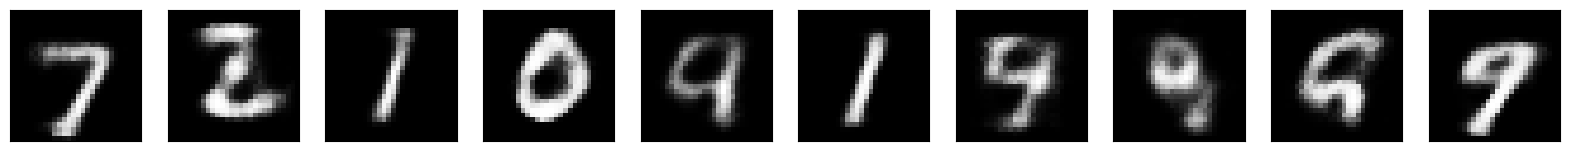

Corresponding mean square error: 

img  0   0.012906639
img  1   0.04096479
img  2   0.0053217486
img  3   0.015536339
img  4   0.019944454
img  5   0.0048120636
img  6   0.035115507
img  7   0.04084478
img  8   0.05321016
img  9   0.017796613
Reconstruction error:

[0.1319161206483841, 0.12260669469833374]


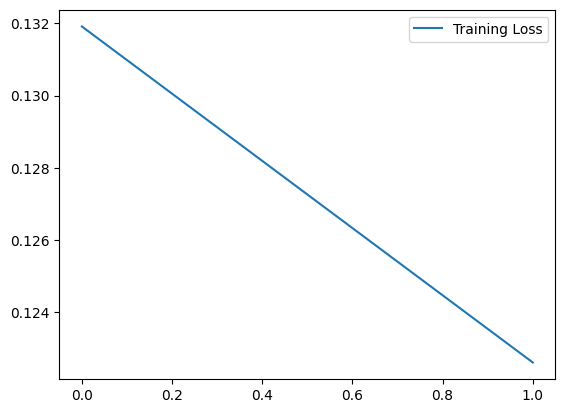

decoded images at epoch  10 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


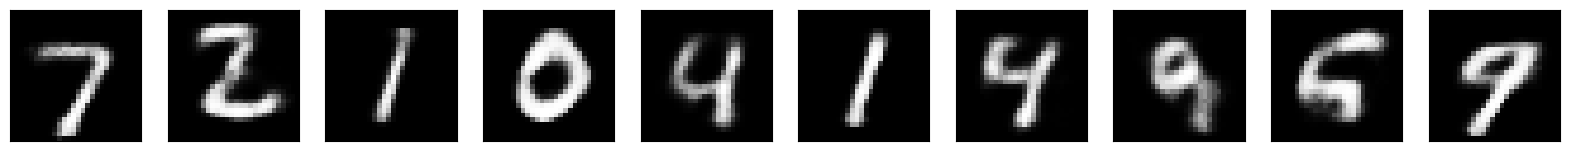

Corresponding mean square error: 

img  0   0.00900472
img  1   0.026744716
img  2   0.0038594531
img  3   0.013206601
img  4   0.012942465
img  5   0.0033533126
img  6   0.021844886
img  7   0.031308822
img  8   0.035826884
img  9   0.01619965


In [5]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:10])

for i in range(2):
    history=autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                verbose = 0)

    print('Reconstruction error:\n')
    print(history.history['loss'])
    plt.plot(history.history["loss"], label="Training Loss")
    plt.legend()
    plt.show()
    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)
    #We compute the reconstruction error for each test image
    print('Corresponding mean square error: \n')
    for i in range(10):
        mse = Losses.MeanSquaredError()
        print('img ',i,' ',mse(decoded_imgs[i],x_test[i]).numpy())



### Super encoding
In this case we reduce the encoded dimension to 2.

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,130 (820.82 KB)

 Trainable params: 210,130 (820.82 KB)

 Non-trainable params: 0 (0.00 B)

original images:


<Figure size 2000x200 with 0 Axes>

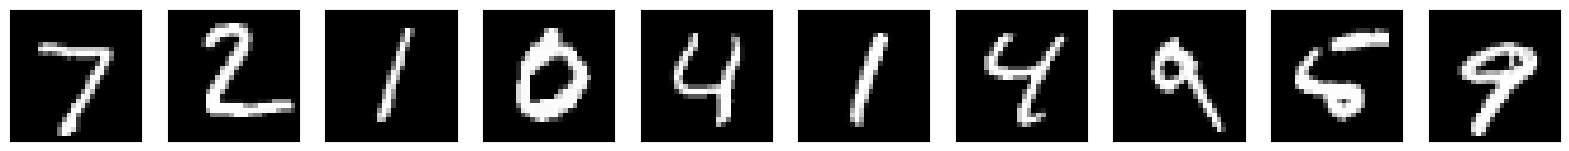

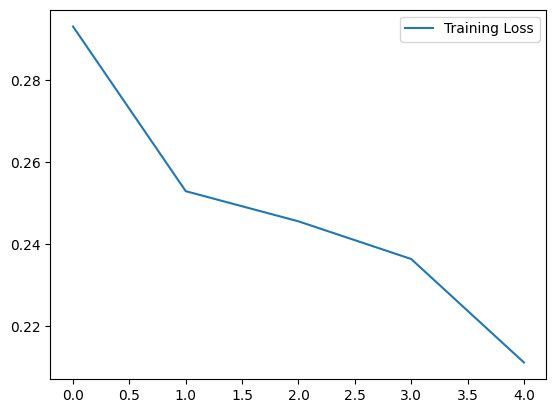

decoded images at epoch  5 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


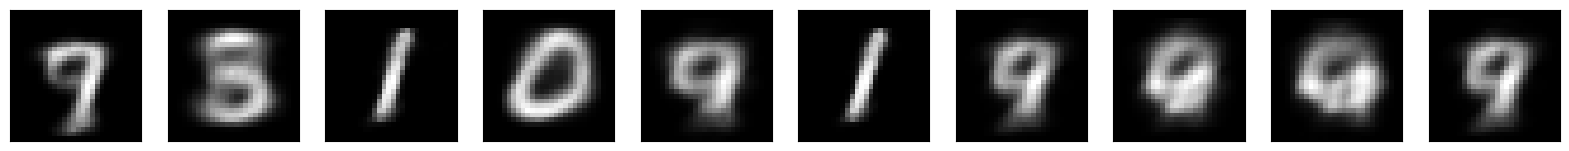

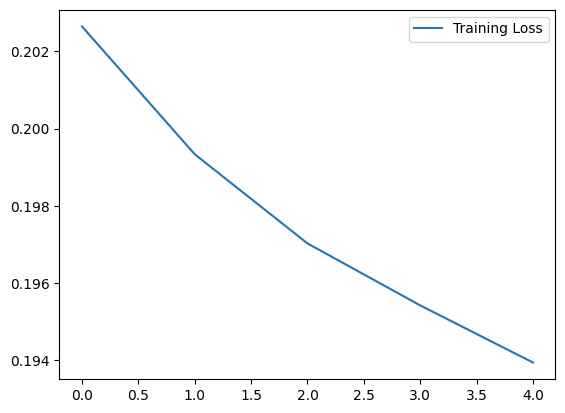

decoded images at epoch  10 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


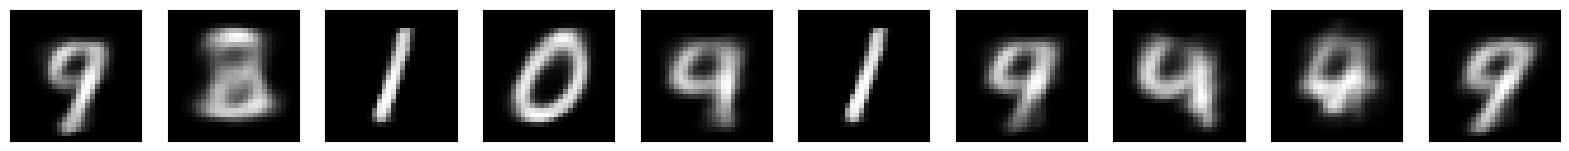

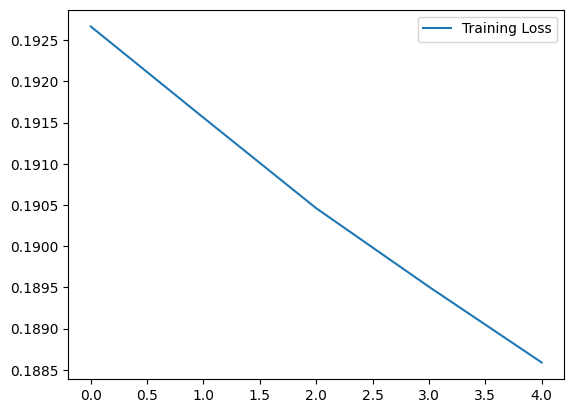

decoded images at epoch  15 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


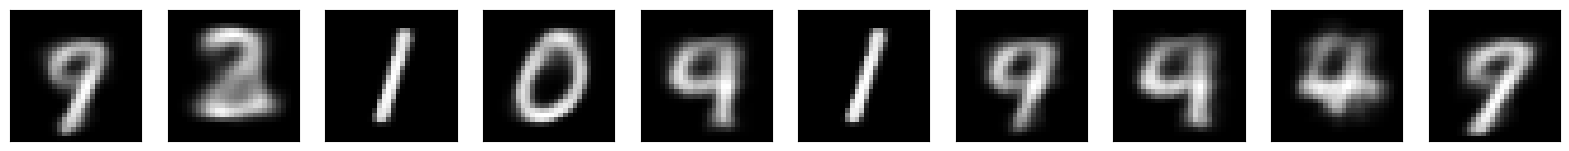

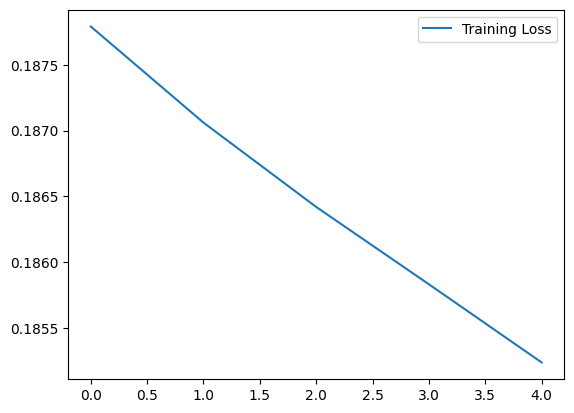

decoded images at epoch  20 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


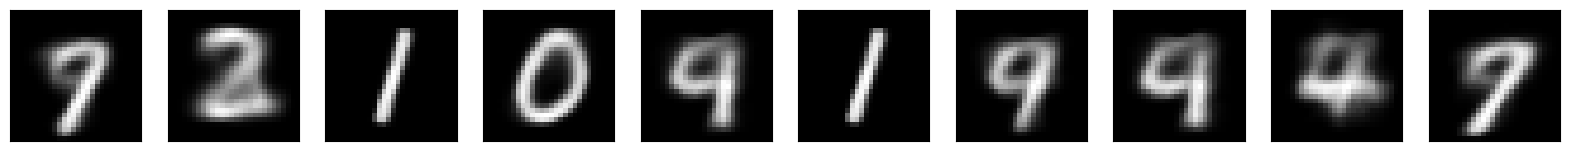

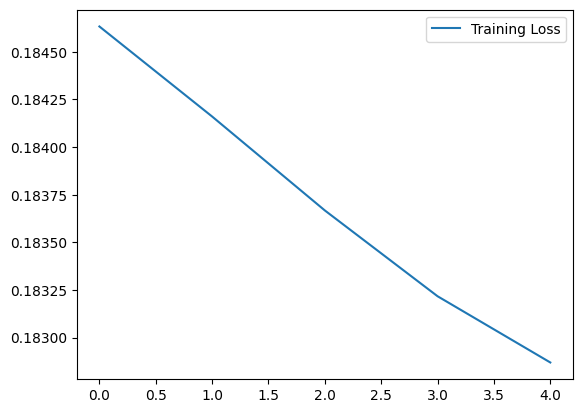

decoded images at epoch  25 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


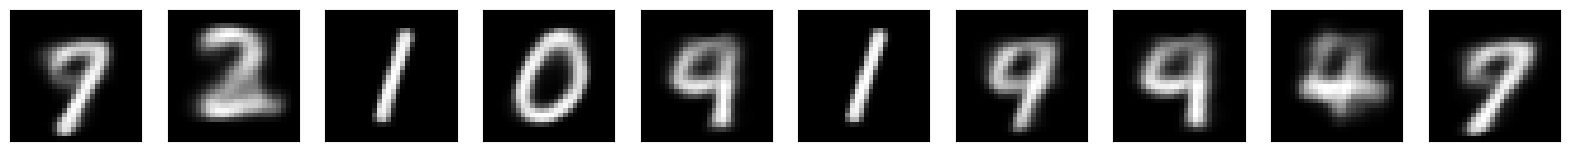

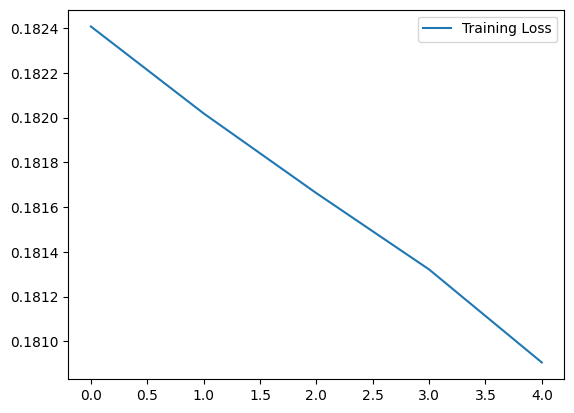

decoded images at epoch  30 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


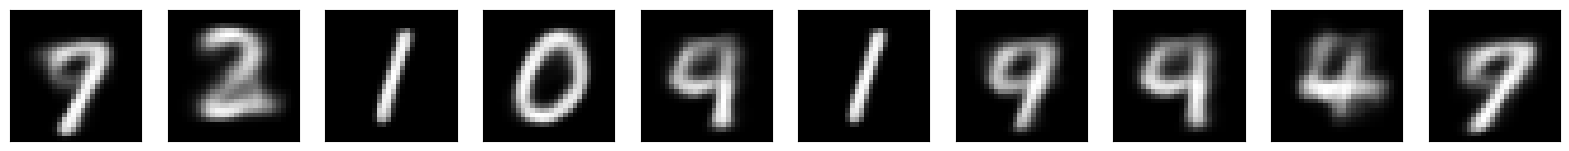

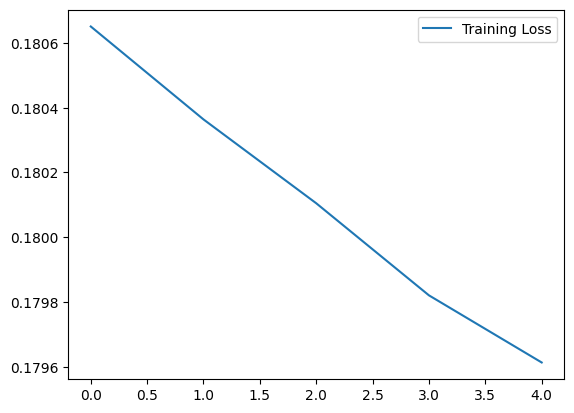

decoded images at epoch  35 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


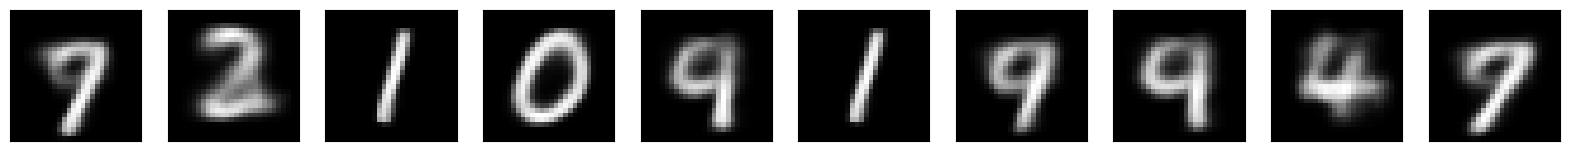

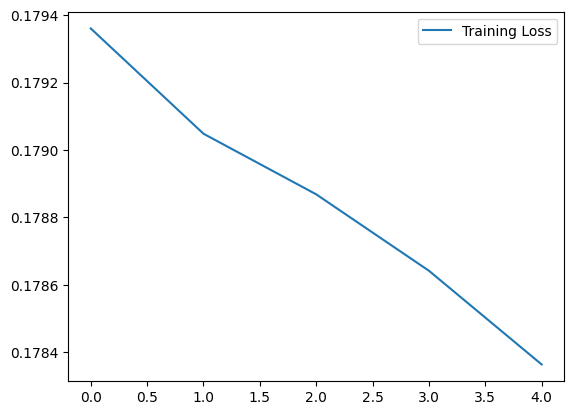

decoded images at epoch  40 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


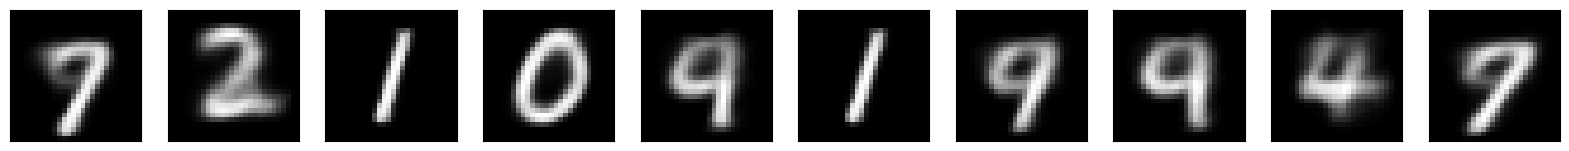

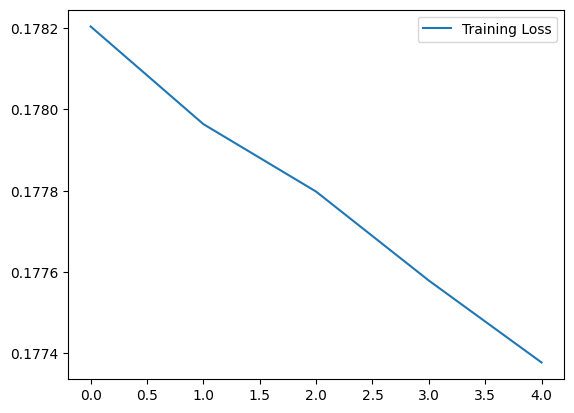

decoded images at epoch  45 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


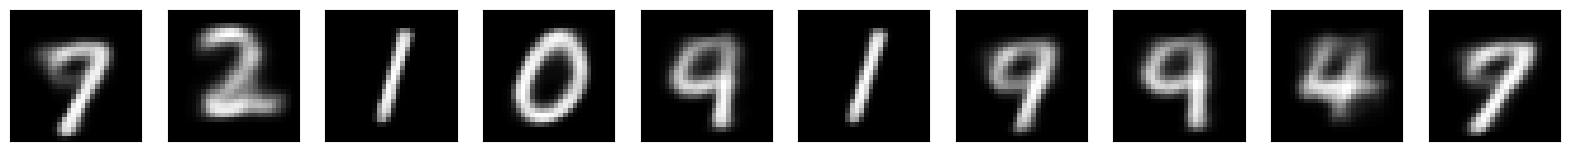

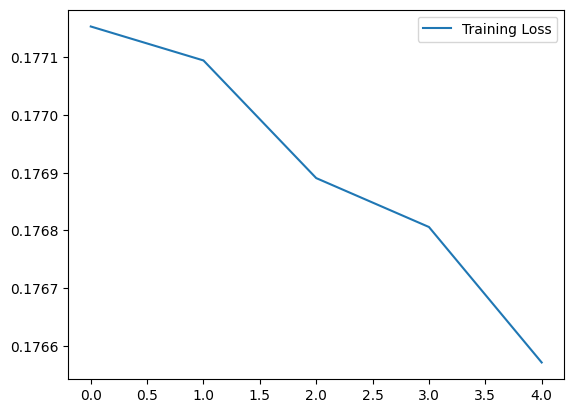

decoded images at epoch  50 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


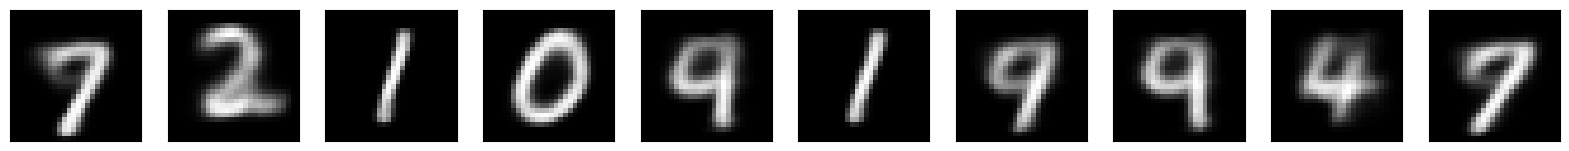

In [6]:
input_img = Input(shape=(28,28,1,))
flat = Flatten()(input_img)
encoded = Dense(128, activation='relu')(flat)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Reshape(target_shape = (28,28,1,))(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:10])

for i in range(10):
    history=autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                verbose = 0)

    plt.plot(history.history["loss"], label="Training Loss")
    plt.legend()
    plt.show()

    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(x_test[:n])
    print_imgs(decoded_imgs)

## 1.2 Convolutional autoencoder

### Exercise.  
Write code for a convolutional autoencoder and see whether the performance is improved

In [7]:
### Your code here
# Convolutional Autoencoder
input_img = Input(shape=(28, 28, 1))

# Encoder - Using Convolutional Layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)  # 28x28 -> 14x14
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)  # 14x14 -> 7x7

# Decoder - Using Transposed Convolutions
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)  # 7x7 -> 14x14
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)  # 14x14 -> 28x28
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create and compile the model
convautoencoder = Model(input_img, decoded)
convautoencoder.compile(optimizer='adam', loss='binary_crossentropy')
convautoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

original images:


<Figure size 2000x200 with 0 Axes>

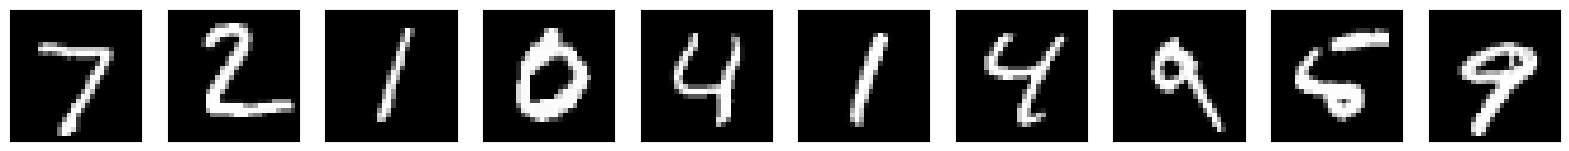

decoded images at epoch  2 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


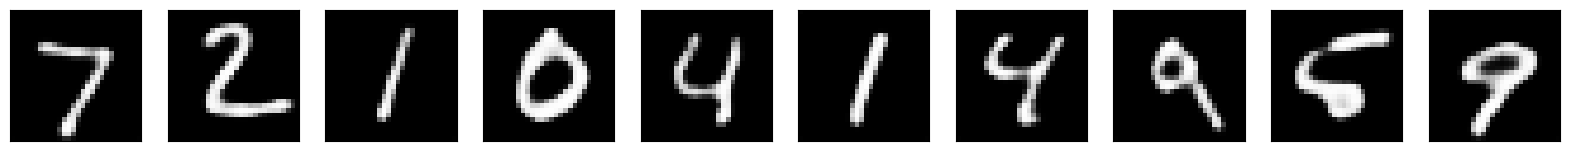

decoded images at epoch  4 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


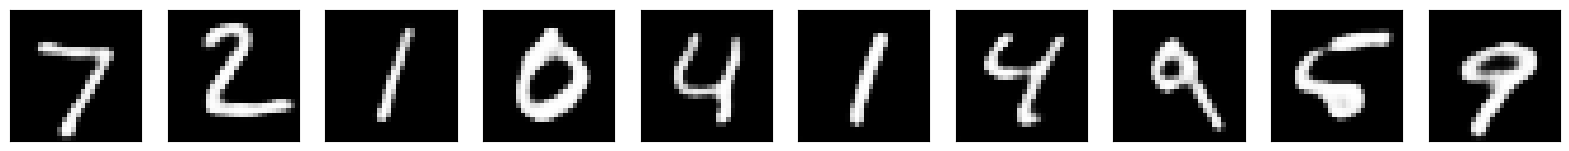

decoded images at epoch  6 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


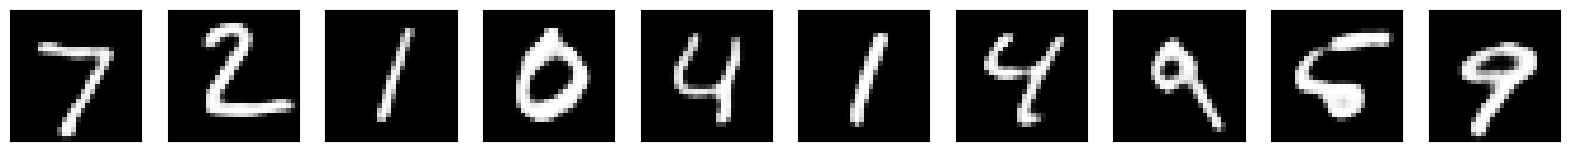

decoded images at epoch  8 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


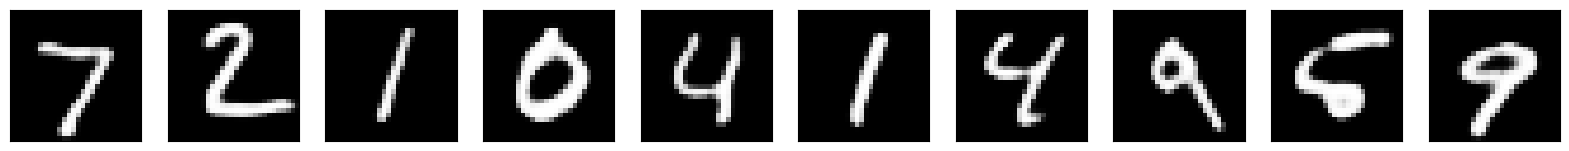

decoded images at epoch  10 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


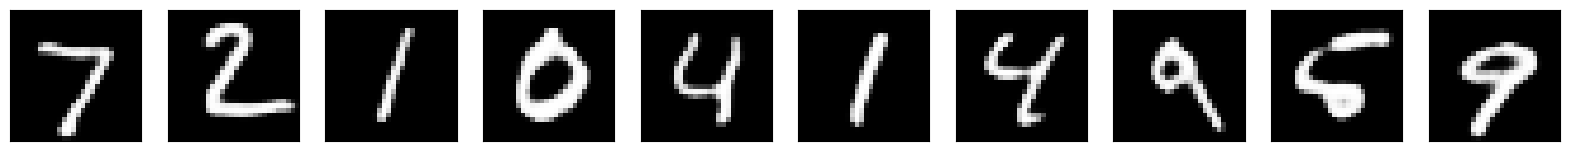

decoded images at epoch  12 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


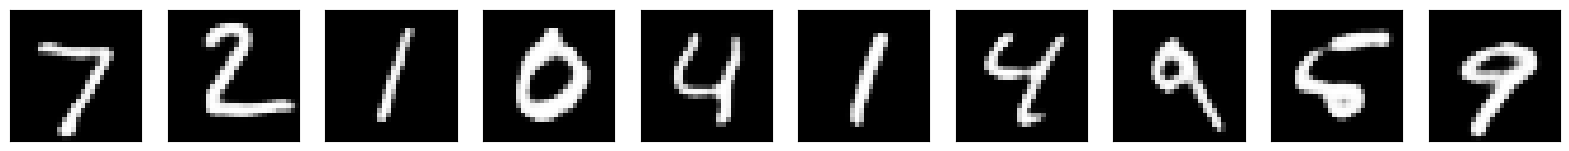

decoded images at epoch  14 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


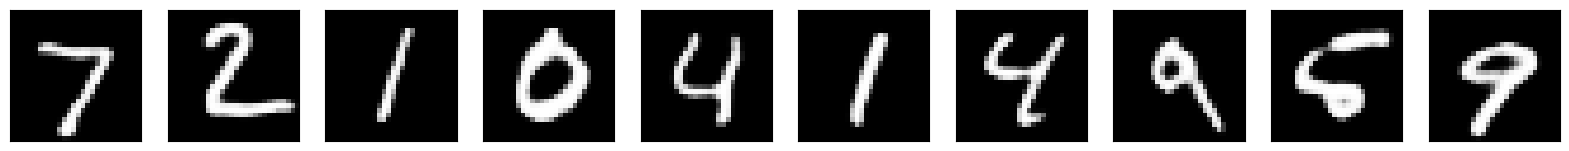

decoded images at epoch  16 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


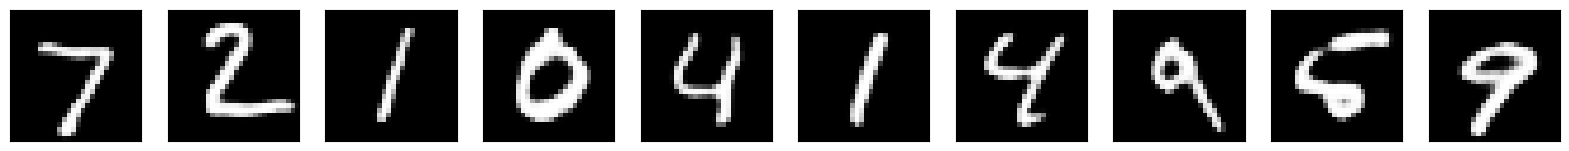

decoded images at epoch  18 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


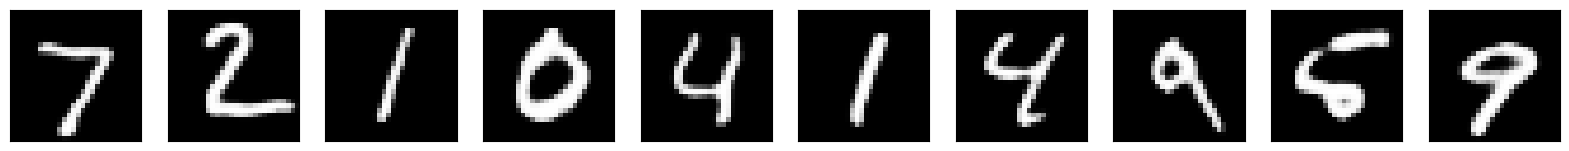

decoded images at epoch  20 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


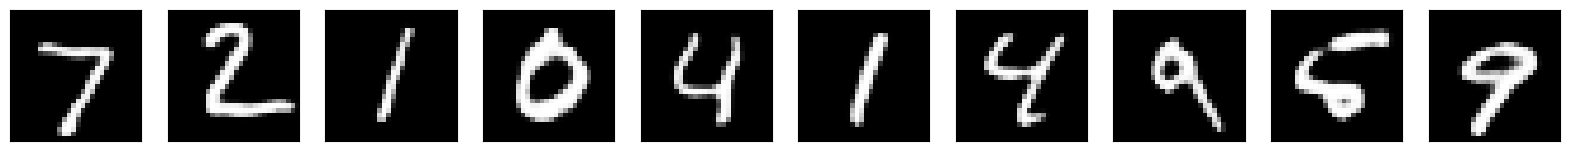

In [8]:
n = 10  # CHANGED: 0 → 10 (show 10 images)
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:n])

for i in range(10):
    convautoencoder.fit(x_train, x_train,  
                epochs=2,
                batch_size=256,
                shuffle=True,
                verbose=0)

    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*2 + 2, ':')
    decoded_imgs = convautoencoder.predict(x_test[:n])  
    print_imgs(decoded_imgs)

## 1.3 Application to image denoising

We first create some noisy images

Original images in test


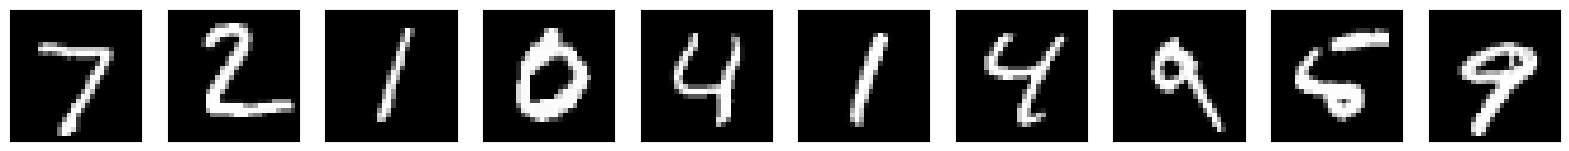

Corresponding noisy images


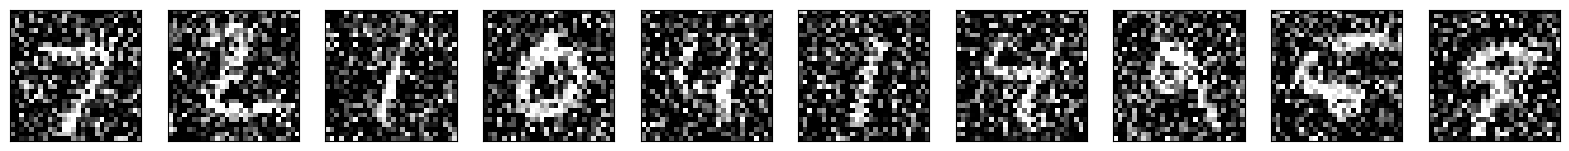

In [9]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print('Original images in test')
print_imgs(x_test[:10])
print('Corresponding noisy images')
print_imgs(x_test_noisy[:10])




And build a convolutional autoencoder

In [10]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

## Your code here

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

convautoencoder = Model(input_img, decoded)
convautoencoder.compile(optimizer='adam', loss='binary_crossentropy')
convautoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

Suppose that we have only 1000 available pairs of noisy-clean images to train.

Test images


<Figure size 2000x200 with 0 Axes>

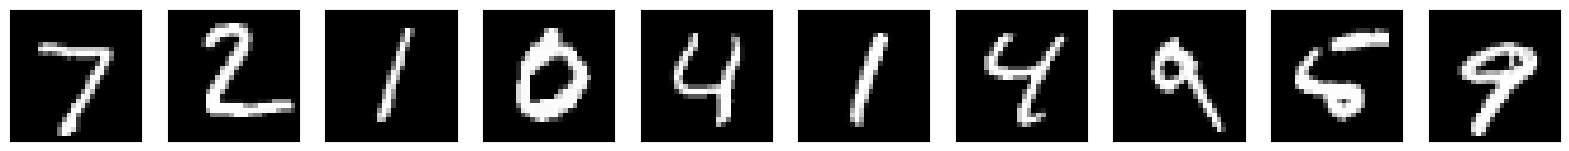

Noisy Test images


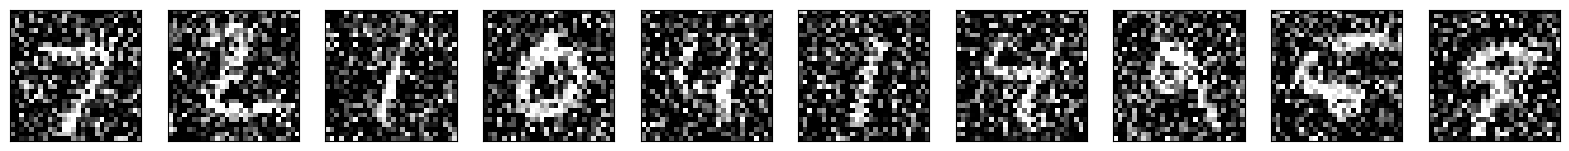

###

decoded test images at epoch  5 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


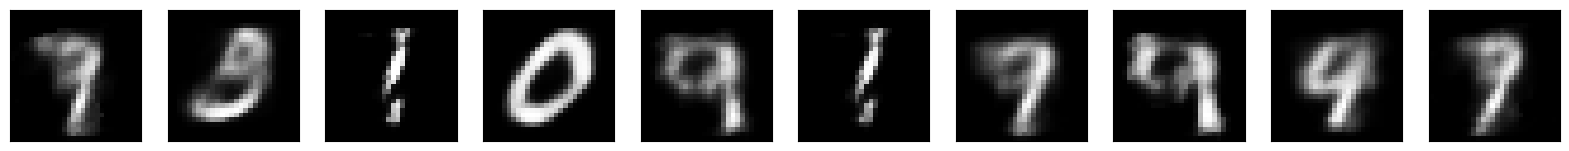

decoded noisy test images at epoch  5 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


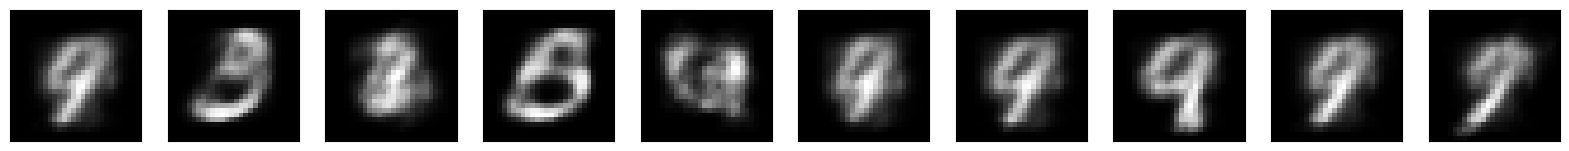

###

###

decoded test images at epoch  10 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


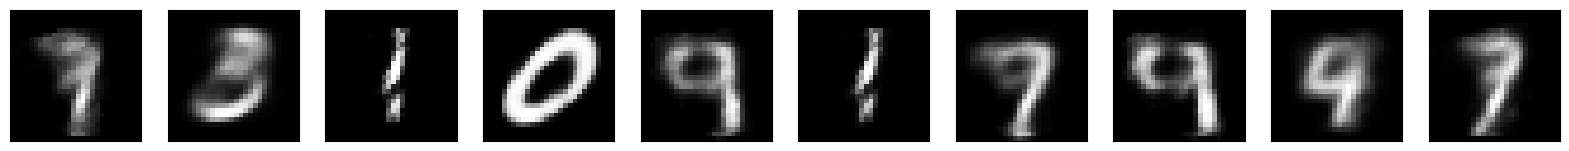

decoded noisy test images at epoch  10 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


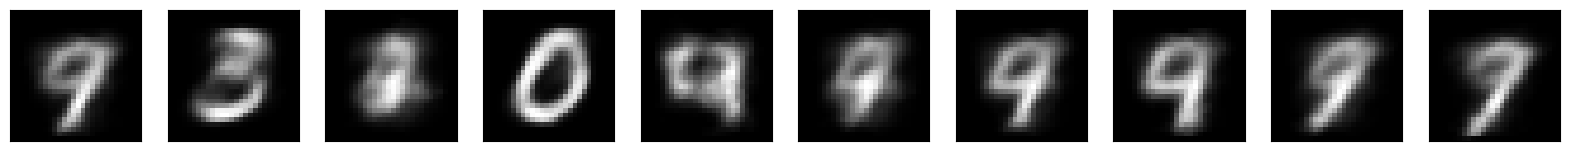

###

###

decoded test images at epoch  15 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


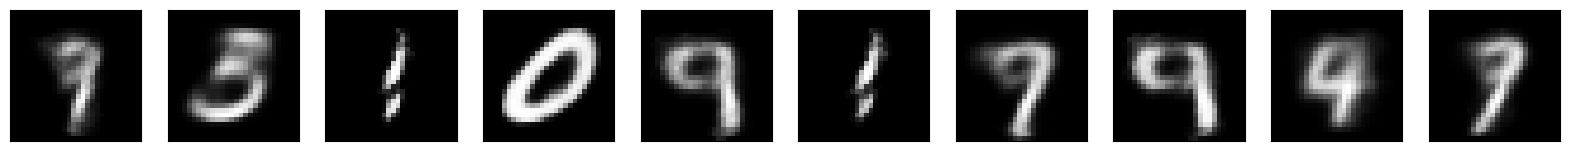

decoded noisy test images at epoch  15 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


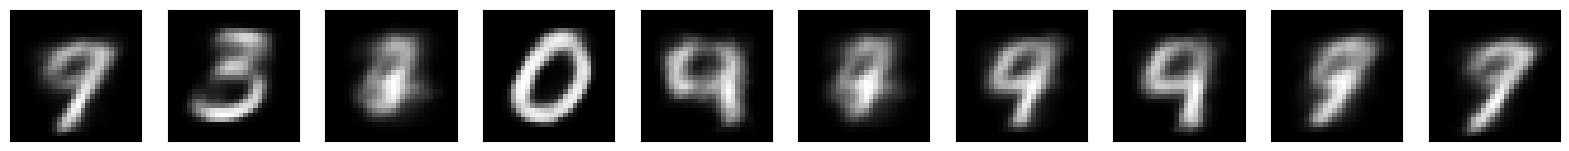

###

###

decoded test images at epoch  20 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


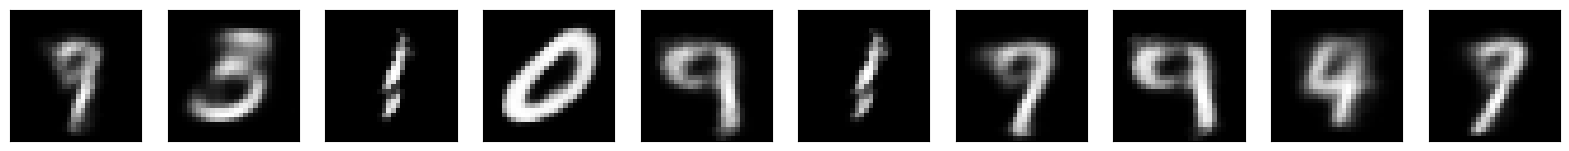

decoded noisy test images at epoch  20 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


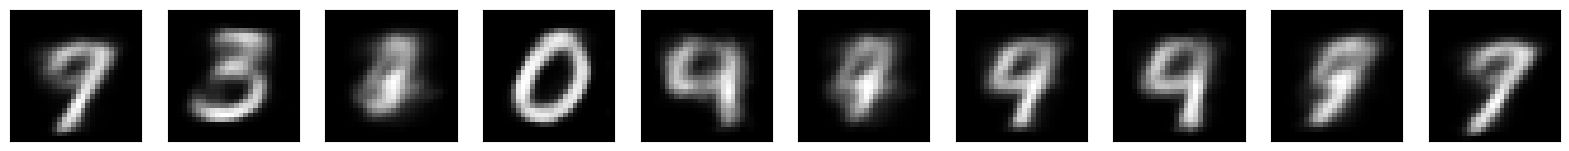

###

###

decoded test images at epoch  25 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


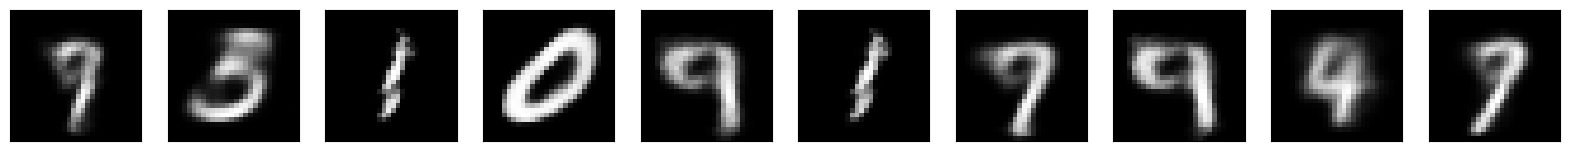

decoded noisy test images at epoch  25 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


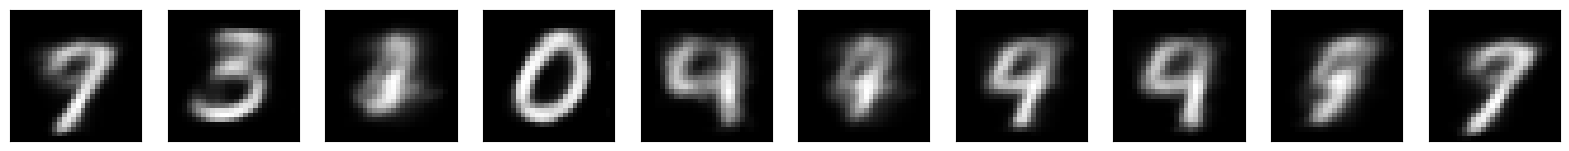

###

###

decoded test images at epoch  30 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


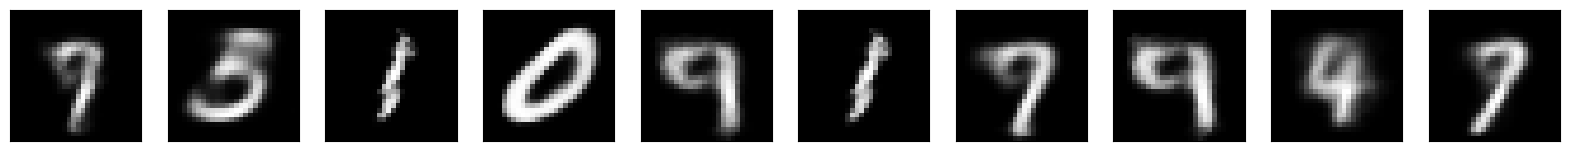

decoded noisy test images at epoch  30 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


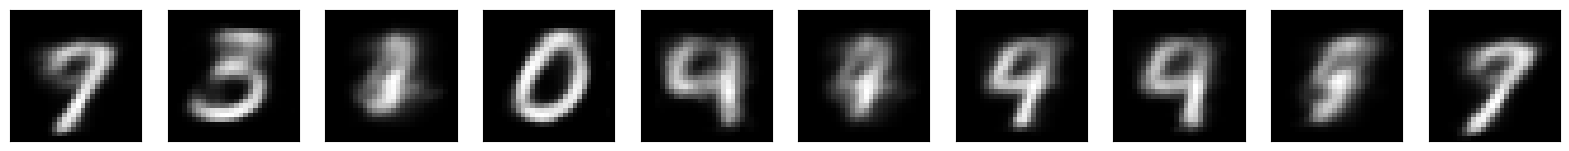

###

###

decoded test images at epoch  35 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


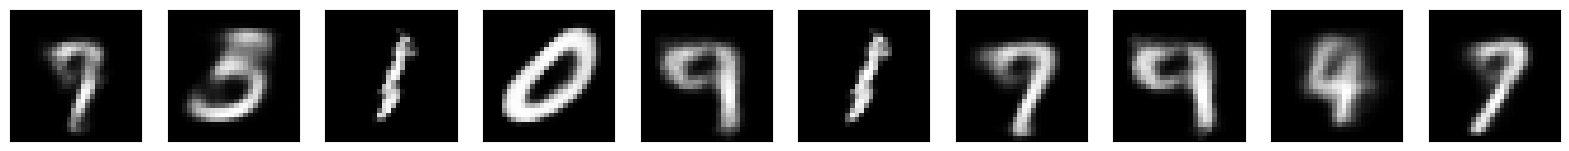

decoded noisy test images at epoch  35 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


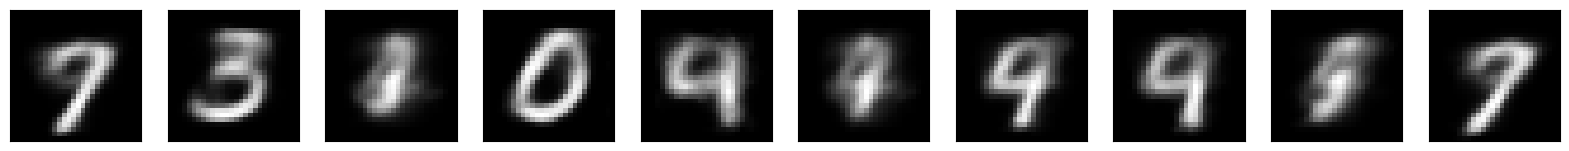

###

###

decoded test images at epoch  40 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


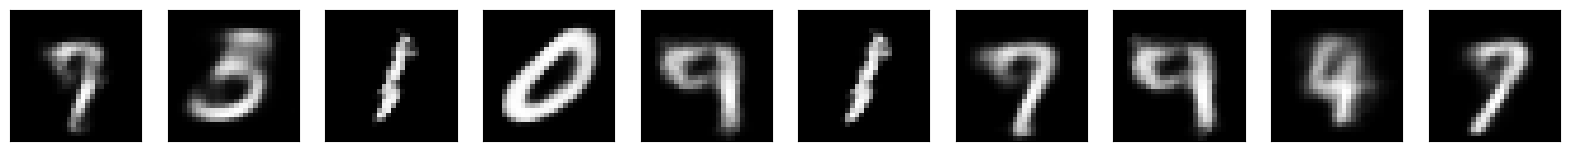

decoded noisy test images at epoch  40 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


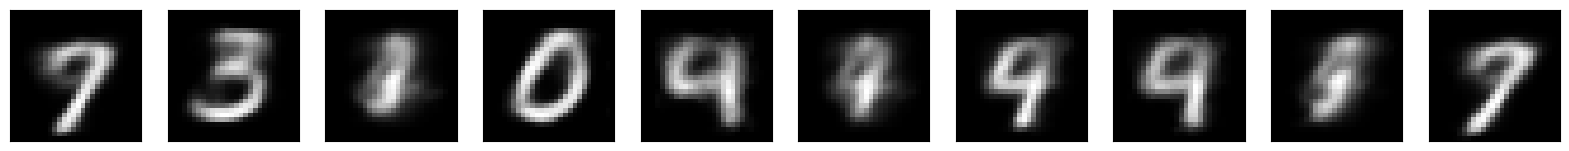

###

###

decoded test images at epoch  45 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


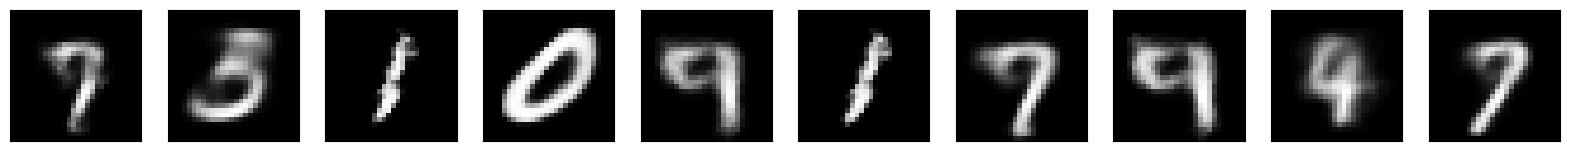

decoded noisy test images at epoch  45 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


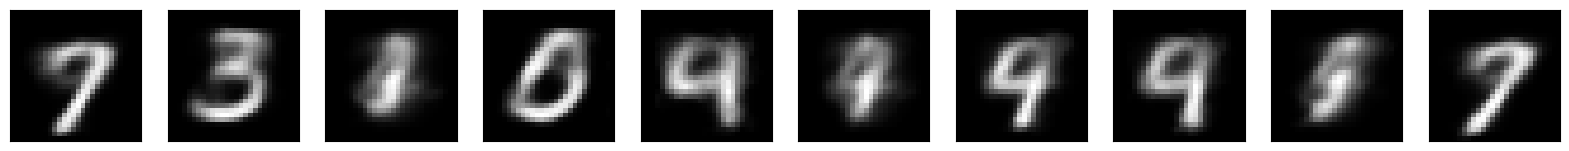

###

###

decoded test images at epoch  50 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


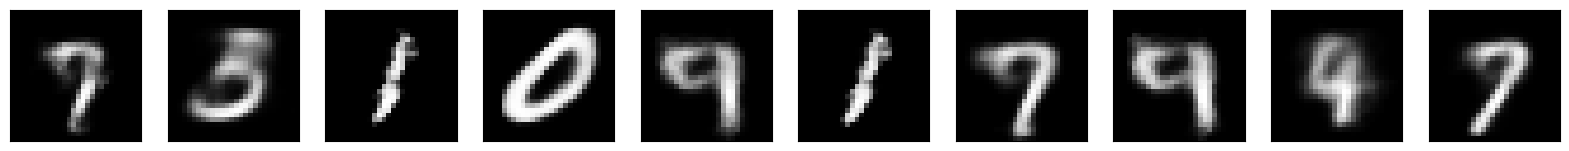

decoded noisy test images at epoch  50 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


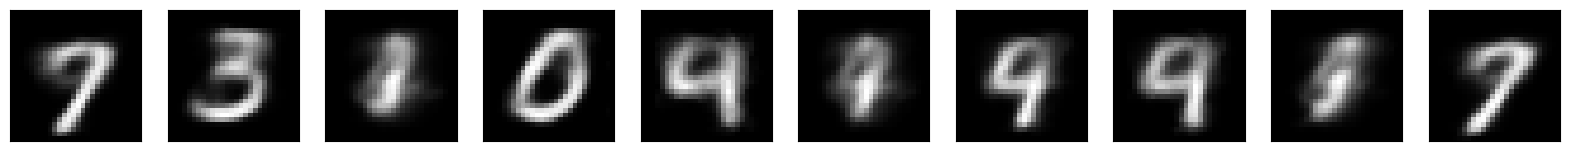

###



In [11]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('Test images')
print_imgs(x_test[:10])
print('Noisy Test images')

print_imgs(x_test_noisy[:10])

for i in range(10):
    autoencoder.fit(x_train_noisy[:1000], x_train[:1000],
                epochs=5,
                batch_size=256,
                shuffle=True,
                verbose = 0)

    # encode and decode some digits
    # note that we take them from the *test* set
    print('###\n')
    print('decoded test images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)
    print('decoded noisy test images at epoch ', i*5 + 5, ':')
    decoded_imgs2 = autoencoder.predict(x_test_noisy[:10])
    print_imgs(decoded_imgs2)
    print('###\n')

## 1.4. Autoencoder with CIFAR-10

### Exercise 4.
Build your Autoencoder with CIFAR-10 and try to denoise CIFAR-10 images

In [12]:
### Your code here
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, Input, Conv2DTranspose, Activation, BatchNormalization, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, LearningRateScheduler
import tensorflow as tf

(train_data_clean, _), (test_data_clean, _) = cifar10.load_data()



# scaling input data
train_data_clean = train_data_clean.astype('float32') / 255.
test_data_clean = test_data_clean.astype('float32') / 255.


def add_noise_and_clip_data(data):
    noise = np.random.normal(loc = 0.0, scale = 0.3, size = data.shape)
    data = data + noise * 0.3
    # noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)  # Direct control
    # data = data + noise
    data = np.clip(data, 0., 1.)
    return data

train_data_noisy = add_noise_and_clip_data(train_data_clean)
test_data_noisy = add_noise_and_clip_data(test_data_clean)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 235s 1us/step


In [13]:
def conv_block(x, filters, kernel_size, strides = 2):
    x = Conv2D(filters = filters,
               kernel_size = kernel_size,
               strides = strides,
               padding = 'same',
               activation = 'relu',
               kernel_regularizer = regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    return x

def deconv_block(x, filters, kernel_size):
    x = Conv2DTranspose(filters = filters,
                        kernel_size = kernel_size,
                        strides = 2,
                        padding = 'same',
                        activation = 'relu',
                        kernel_regularizer = regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    return x

using  U-Net architecture good for Denoising, Low-level features (edges, colors) from early encoder

High-level features (shapes, objects) from deep encoder

Combined for optimal reconstruction

In [14]:
def autoencoder():
    inputs = Input(shape = (32, 32, 3), name = 'inputs')
    conv_block1 = conv_block(inputs, 32, 3)
    conv_block2 = conv_block(conv_block1, 64, 3)
    conv_block3 = conv_block(conv_block2, 128, 3)
    conv_block4 = conv_block(conv_block3, 256, 3)
    conv_block5 = conv_block(conv_block4, 256, 3)
    conv_block6 = conv_block(conv_block5, 512, 3, 1)

    deconv_block1 = deconv_block(conv_block6, 512, 3)
    merge1 = Concatenate()([deconv_block1, conv_block4])
    deconv_block2 = deconv_block(merge1, 256, 3)
    merge2 = Concatenate()([deconv_block2, conv_block3])
    deconv_block3 = deconv_block(merge2, 128, 3)
    merge3 = Concatenate()([deconv_block3, conv_block2])
    deconv_block4 = deconv_block(merge3, 64, 3)
    merge4 = Concatenate()([deconv_block4, conv_block1])
    deconv_block5 = deconv_block(merge4, 32, 3)

    final_deconv = Conv2DTranspose(filters = 3, kernel_size = 3, padding = 'same')(deconv_block5)
    outputs = Activation('sigmoid', name = 'output')(final_deconv)
    return Model(inputs, outputs, name = 'autoencoder')

In [15]:
model = autoencoder()
model.compile(optimizer = "adam", loss = 'mse')
model.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer) │ (None, 32, 32, 3) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 16, 16,    │        896 │ inputs[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 16, 16,    │        128 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 8, 8, 64)  │     18,496 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 4, 4, 128) │     73,856 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4, 4, 128) │        512 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 2, 2, 256) │    295,168 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2, 2, 256) │      1,024 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 1, 1, 256) │    590,080 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 1, 256) │      1,024 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 1, 1, 512) │  1,180,160 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 1, 512) │      2,048 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 2, 2, 512) │  2,359,808 │ batch_normalizat… │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2, 2, 512) │      2,048 │ conv2d_transpose… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2, 2, 768) │          0 │ batch_normalizat… │
│ (Concatenate)       │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 4, 4, 256) │  1,769,728 │ concatenate[0][0] │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4, 4, 256) │      1,024 │ conv2d_transpose… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 4, 4, 384) │          0 │ batch_normalizat

 Total params: 6,878,851 (26.24 MB)

 Trainable params: 6,874,371 (26.22 MB)

 Non-trainable params: 4,480 (17.50 KB)

In [16]:
history = model.fit(train_data_noisy,
                    train_data_clean,
                    validation_data = (test_data_noisy, test_data_clean),
                    epochs = 25,
                    batch_size = 128,
                    shuffle = True)

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 754s 2s/step - loss: 0.0739 - val_loss: 0.0512
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 706s 2s/step - loss: 0.0029 - val_loss: 0.0036
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 505s 1s/step - loss: 0.0022 - val_loss: 0.0026
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 388s 835ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 330s 843ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 340s 870ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 340s 871ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 341s 872ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 9/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 340s 870ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 10/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 337s 861ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 11/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 341s 871ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 12/25
391/3

## 2. Translate this notebook to pytorch

In [17]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [18]:
# Loading the dataset

tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(root="./data", train=True,
                         download=True, transform=tensor_transform)
loader = torch.utils.data.DataLoader(
    dataset=dataset, batch_size=32, shuffle=True)

100%|██████████| 9.91M/9.91M [00:03<00:00, 2.80MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 327kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 1.70MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 357kB/s]


In [19]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9)
        )
        self.decoder = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [20]:
model = AE()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-8)

Epoch 1/20, Loss: 0.044307
Epoch 2/20, Loss: 0.034738
Epoch 3/20, Loss: 0.031147
Epoch 4/20, Loss: 0.032008
Epoch 5/20, Loss: 0.029003
Epoch 6/20, Loss: 0.023942
Epoch 7/20, Loss: 0.030943
Epoch 8/20, Loss: 0.026601
Epoch 9/20, Loss: 0.026576
Epoch 10/20, Loss: 0.023273
Epoch 11/20, Loss: 0.024628
Epoch 12/20, Loss: 0.018741
Epoch 13/20, Loss: 0.019923
Epoch 14/20, Loss: 0.022152
Epoch 15/20, Loss: 0.024843
Epoch 16/20, Loss: 0.022842
Epoch 17/20, Loss: 0.021782
Epoch 18/20, Loss: 0.018286
Epoch 19/20, Loss: 0.019474
Epoch 20/20, Loss: 0.020182


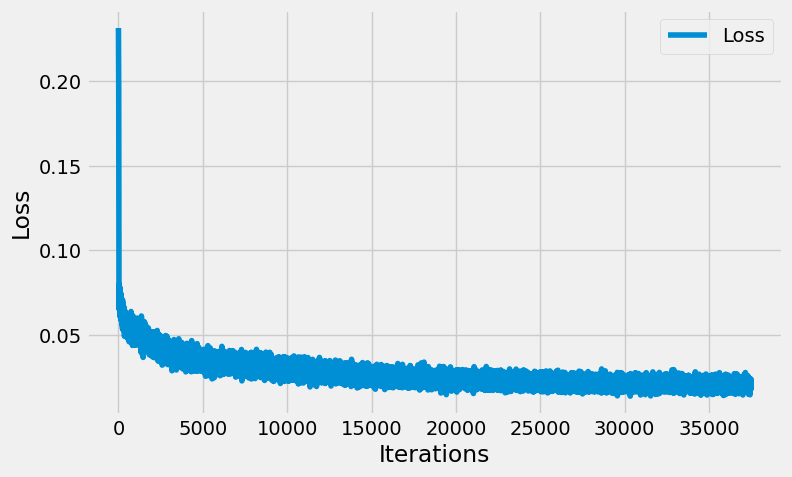

In [21]:
epochs = 20
outputs = []
losses = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
    for images, _ in loader:
        images = images.view(-1, 28 * 28).to(device)

        reconstructed = model(images)
        loss = loss_function(reconstructed, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    outputs.append((epoch, images, reconstructed))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

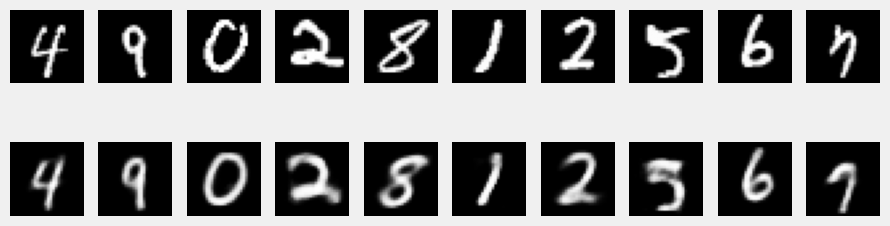

In [22]:
model.eval()
dataiter = iter(loader)
images, _ = next(dataiter)

images = images.view(-1, 28 * 28).to(device)
reconstructed = model(images)

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for i in range(10):
    axes[0, i].imshow(images[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
plt.show()

### CIFAR-10 using PyTorch

In [28]:
tensor_transform = transforms.ToTensor()
dataset = datasets.CIFAR10(root="./data", train=True,
                         download=True, transform=tensor_transform)
loader = torch.utils.data.DataLoader(
    dataset=dataset, batch_size=32, shuffle=True)

100%|██████████| 170M/170M [02:19<00:00, 1.22MB/s] 


In [29]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(32 * 32 * 3, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9)
        )
        self.decoder = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 32 * 32 * 3),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [30]:
model = AE()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-8)

Epoch 1/20, Loss: 0.030571
Epoch 2/20, Loss: 0.024093
Epoch 3/20, Loss: 0.031141
Epoch 4/20, Loss: 0.025996
Epoch 5/20, Loss: 0.029024
Epoch 6/20, Loss: 0.025355
Epoch 7/20, Loss: 0.022405
Epoch 8/20, Loss: 0.025657
Epoch 9/20, Loss: 0.019290
Epoch 10/20, Loss: 0.017112
Epoch 11/20, Loss: 0.026705
Epoch 12/20, Loss: 0.023051
Epoch 13/20, Loss: 0.022608
Epoch 14/20, Loss: 0.023296
Epoch 15/20, Loss: 0.025495
Epoch 16/20, Loss: 0.023211
Epoch 17/20, Loss: 0.021561
Epoch 18/20, Loss: 0.023165
Epoch 19/20, Loss: 0.022301
Epoch 20/20, Loss: 0.026397


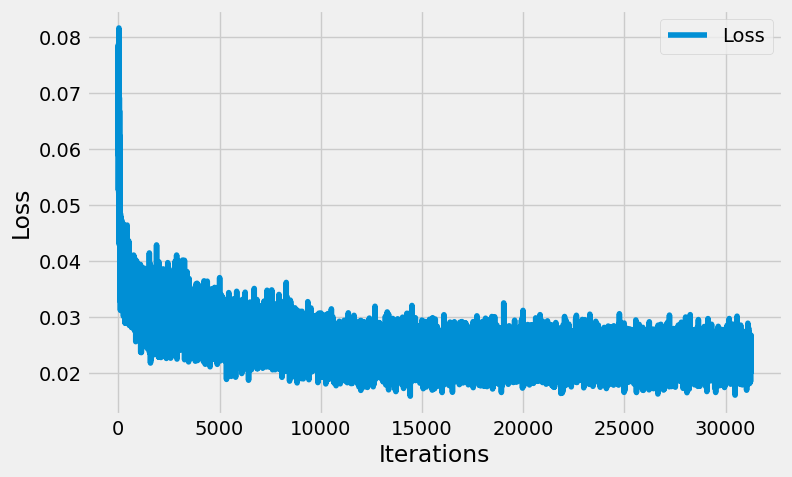

In [31]:
epochs = 20
outputs = []
losses = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
    for images, _ in loader:
        images = images.view(-1, 32 * 32 * 3).to(device) # Changed from 32*32 to 32*32*3

        reconstructed = model(images)
        loss = loss_function(reconstructed, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    outputs.append((epoch, images, reconstructed))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

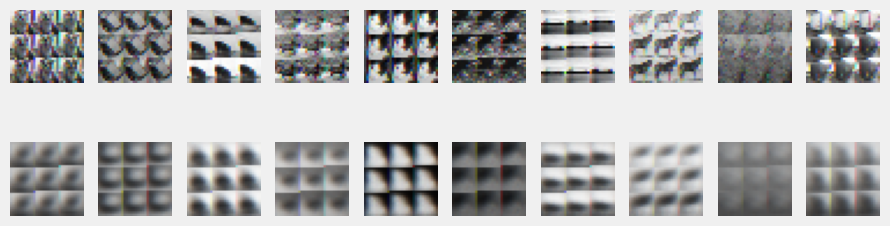

In [32]:
model.eval()
dataiter = iter(loader)
images, _ = next(dataiter)

images = images.view(-1, 32 * 32 * 3).to(device) # Changed from 32*32 to 32*32*3
reconstructed = model(images)

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for i in range(10):
    # Display original images
    axes[0, i].imshow(images[i].cpu().detach().numpy().reshape(32, 32, 3))
    axes[0, i].axis('off')
    # Display reconstructed images
    axes[1, i].imshow(reconstructed[i].cpu().detach().numpy().reshape(32, 32, 3))
    axes[1, i].axis('off')
plt.show()